In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data
OCD_Patient_data = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\Unified_Mentor\OCD Patient Dataset_ Demographics & Clinical Data -Project 2\OCD Patient Dataset_ Demographics & Clinical Data.csv')
#display the observations
OCD_Patient_data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [3]:
#summary of dataset
OCD_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [4]:
#checking the null values
#OCD_Patient_data.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})
OCD_Patient_data.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [5]:
#find the duplicated rows
OCD_Patient_data.duplicated().sum()

0

In [6]:
# Replace 'None' with 'No Family History' in the "Previous Diagnoses" column
OCD_Patient_data['Previous Diagnoses'] = OCD_Patient_data['Previous Diagnoses'].replace('None', 'No Family History')
OCD_Patient_data['Previous Diagnoses'] 

0                     MDD
1       No Family History
2                     MDD
3                    PTSD
4                    PTSD
              ...        
1495                  MDD
1496                  GAD
1497    No Family History
1498                  GAD
1499    No Family History
Name: Previous Diagnoses, Length: 1500, dtype: object

In [7]:
OCD_Patient_data['Medications'] = OCD_Patient_data['Medications'].replace('None', 'No Medications')
OCD_Patient_data['Medications']

0                 SNRI
1                 SSRI
2       Benzodiazepine
3                 SSRI
4       No Medications
             ...      
1495              SSRI
1496              SSRI
1497    Benzodiazepine
1498    Benzodiazepine
1499              SNRI
Name: Medications, Length: 1500, dtype: object

In [8]:
#arranging numerical and categorical columns
OCD_Patient_data_cal=OCD_Patient_data.select_dtypes(include='object')
OCD_Patient_data_num=OCD_Patient_data.select_dtypes(include='number')

In [9]:
OCD_Patient_data_cal.head()

,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Depression Diagnosis,Anxiety Diagnosis,Medications
0,Female,African,Single,Some College,2016-07-15,MDD,No,Harm-related,Checking,Yes,Yes,SNRI
1,Male,African,Divorced,Some College,2017-04-28,No Family History,Yes,Harm-related,Washing,Yes,Yes,SSRI
2,Male,Hispanic,Divorced,College Degree,2018-02-02,MDD,No,Contamination,Checking,No,No,Benzodiazepine
3,Female,Hispanic,Married,College Degree,2014-08-25,PTSD,Yes,Symmetry,Washing,Yes,Yes,SSRI
4,Female,Hispanic,Married,High School,2022-02-20,PTSD,Yes,Hoarding,Ordering,No,No,No Medications


In [10]:
OCD_Patient_data_num.head()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
0,1018,32,203,17,10
1,2406,69,180,21,25
2,1188,57,173,3,4
3,6200,27,126,14,28
4,5824,56,168,39,18


In [11]:
OCD_Patient_data_cal.describe()

,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Depression Diagnosis,Anxiety Diagnosis,Medications
count,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,2,4,3,4,1218,5,2,5,5,2,2,4
top,Male,Caucasian,Single,Some College,2017-06-21,MDD,Yes,Harm-related,Washing,Yes,Yes,Benzodiazepine
freq,753,398,511,394,4,345,760,333,321,772,751,386


In [12]:
OCD_Patient_data_num.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


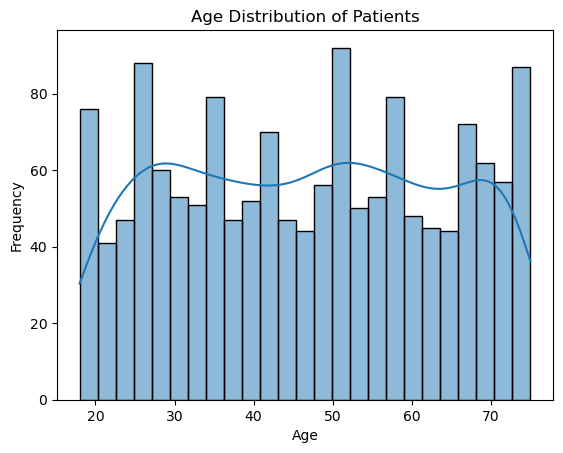

In [13]:
# Age distribution
sns.histplot(OCD_Patient_data['Age'], bins=25, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


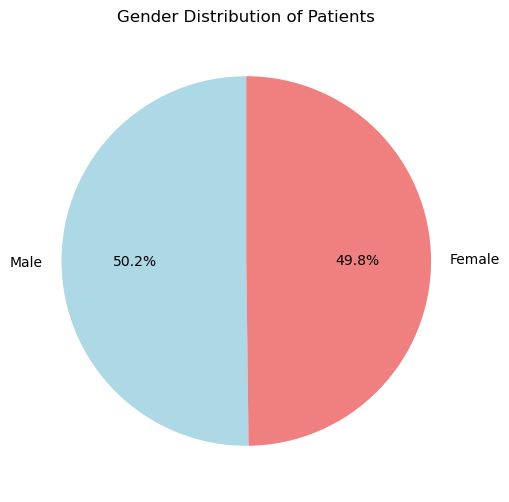

In [14]:
Gender=OCD_Patient_data['Gender'].value_counts()
# Pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(Gender, labels=Gender.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Gender Distribution of Patients')
#plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

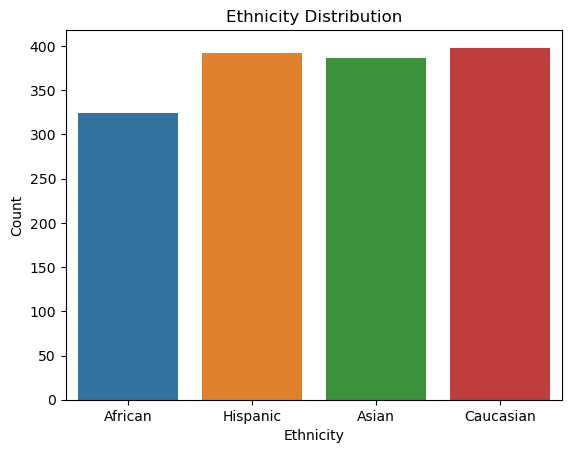

In [15]:
# Ethnicity distribution
sns.countplot(x='Ethnicity', data=OCD_Patient_data)
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()


In [16]:
#  Distribution of symptom duration according to age and gender


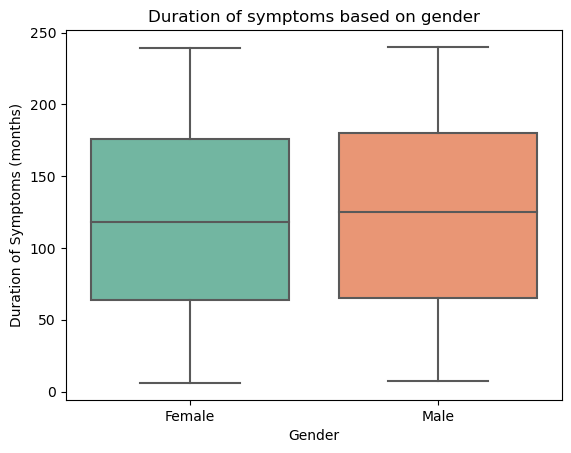

In [17]:
sns.boxplot(x="Gender", y="Duration of Symptoms (months)", data=OCD_Patient_data, palette="Set2")
plt.title("Duration of symptoms based on gender")
plt.show()


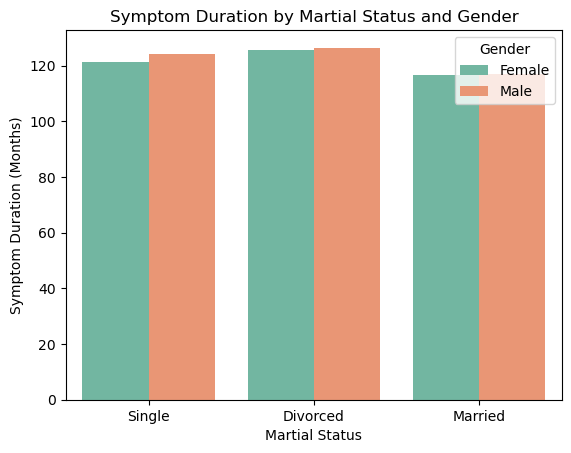

In [18]:
# Ethnicity distribution
sns.barplot(
    x="Marital Status", 
    y="Duration of Symptoms (months)", 
    hue="Gender", 
    data=OCD_Patient_data, 
    palette="Set2",errorbar=None)
plt.title("Symptom Duration by Martial Status and Gender")
plt.xlabel("Martial Status")
plt.ylabel("Symptom Duration (Months)")
plt.legend(title="Gender")
plt.show()


Across all martial groups (Single, Divorced, Married), the symptom duration appears to be consistent and similar for both males and females, indicating no significant variation between genders.

For the Married category, females seem to have a slightly shorter symptom duration compared to males. However, the difference is minimal.

Both genders in the Divorced category exhibit slightly higher symptom durations than those in the Single and Married categories.

Single and Married individuals show almost identical symptom durations, suggesting that marital status may not significantly influence symptom duration in these categories.

Insights: There might be underlying psychological or social factors affecting symptom duration for the Divorced group since they have a marginally higher duration.Gender does not appear to significantly impact symptom duration, as differences between males and females are negligible in all age groups.

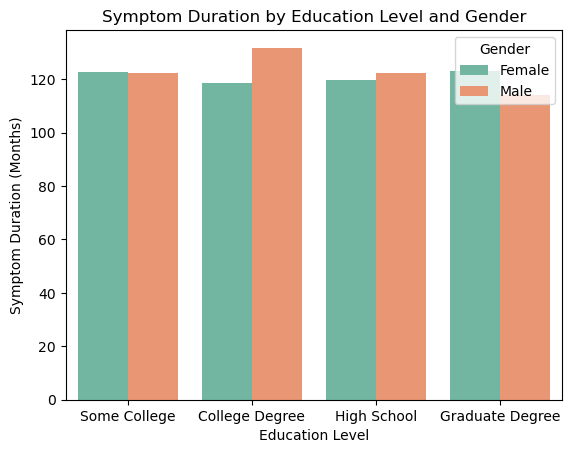

In [19]:

sns.barplot(
    x="Education Level", 
    y="Duration of Symptoms (months)", 
    hue="Gender", 
    data=OCD_Patient_data, 
    palette="Set2",errorbar=None)
plt.title("Symptom Duration by Education Level and Gender")
plt.xlabel("Education Level")
plt.ylabel("Symptom Duration (Months)")
plt.legend(title="Gender")
plt.show()

Symptom durations are relatively consistent across all education levels.
There is no dramatic difference in the duration of symptoms based on education level.

Males consistently have slightly longer symptom durations compared to females across most education levels, particularly for individuals with a college degree.

Individuals with a college degree (both male and female) appear to have slightly longer symptom durations than those with other education levels.
Those with graduate degrees or high school education show somewhat similar symptom durations.

In [20]:
# Find the largest and smallest age
lowest_age = OCD_Patient_data['Age'].min()

largest_age = OCD_Patient_data['Age'].max()

print(f"Lowest Age: {lowest_age}")
print(f"Largest Age: {largest_age}")

Lowest Age: 18
Largest Age: 75


In [21]:
bins = list(range(18, 79, 3))  # Creates bins from 18 to 75 

# Create labels for the intervals
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
OCD_Patient_data['Age_Group'] = pd.cut(OCD_Patient_data['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows
print(OCD_Patient_data[['Age', 'Age_Group']].head())

   Age Age_Group
0   32     30-32
1   69     69-71
2   57     57-59
3   27     27-29
4   56     54-56


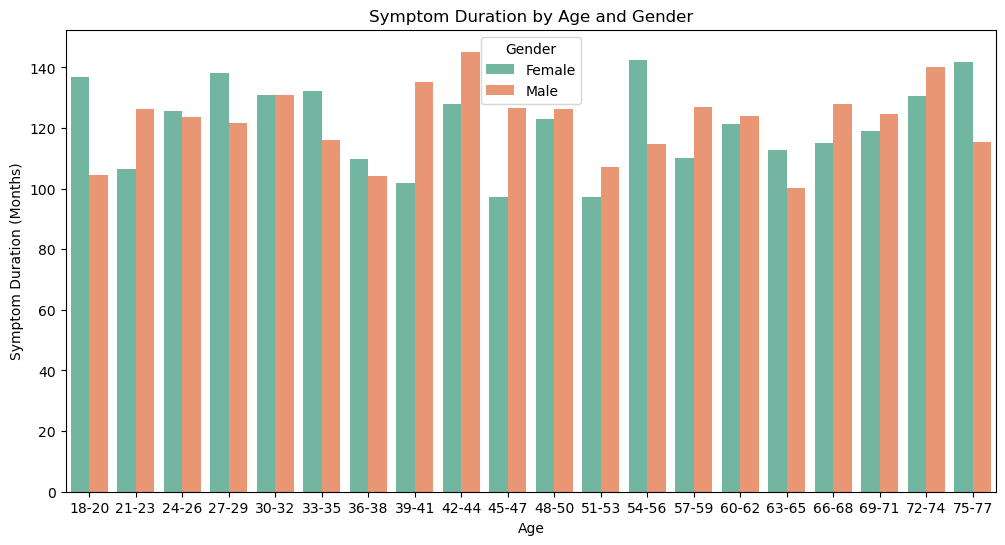

In [22]:
#Barplot by age and gender
plt.figure(figsize=(12, 6))
#sns.scatterplot(x="Age_Group", y="Duration of Symptoms (months)", hue="Gender", data=OCD_Patient_data, palette="Set2")
sns.barplot(
    x="Age_Group", 
    y="Duration of Symptoms (months)", 
    hue="Gender", 
    data=OCD_Patient_data, 
    palette="Set2",errorbar=None)
plt.title("Symptom Duration by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Symptom Duration (Months)")
plt.legend(title="Gender")
plt.show()

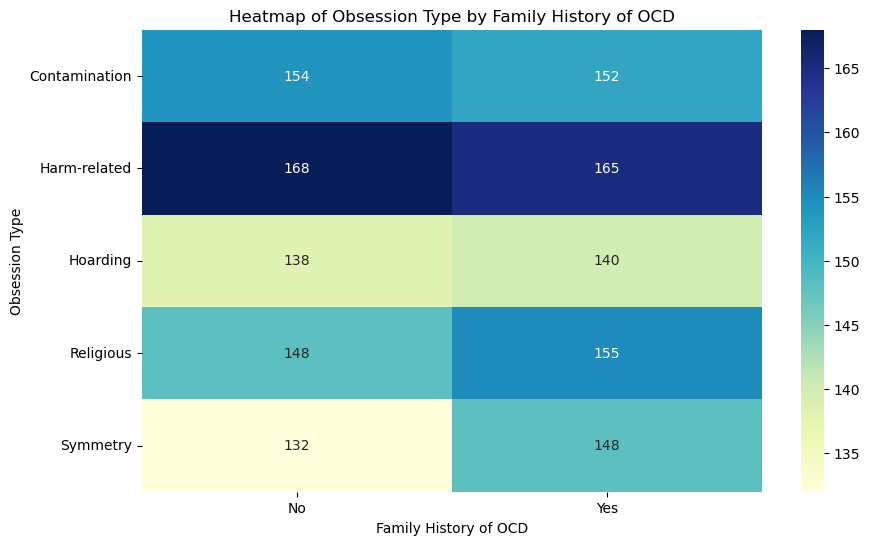

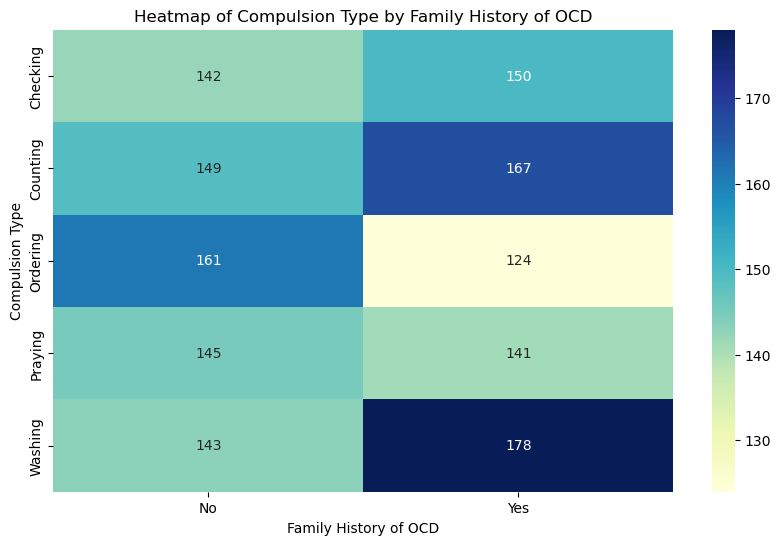

In [23]:


# Create crosstabs for the heatmap
obs_heatmap = pd.crosstab(OCD_Patient_data["Obsession Type"], OCD_Patient_data["Family History of OCD"])
comp_heatmap = pd.crosstab(OCD_Patient_data["Compulsion Type"], OCD_Patient_data["Family History of OCD"])

# Heatmap for Obsession Type
plt.figure(figsize=(10, 6))
sns.heatmap(obs_heatmap, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Obsession Type by Family History of OCD")
plt.xlabel("Family History of OCD")
plt.ylabel("Obsession Type")
plt.show()

# Heatmap for Compulsion Type
plt.figure(figsize=(10, 6))
sns.heatmap(comp_heatmap, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Compulsion Type by Family History of OCD")
plt.xlabel("Family History of OCD")
plt.ylabel("Compulsion Type")
plt.show()


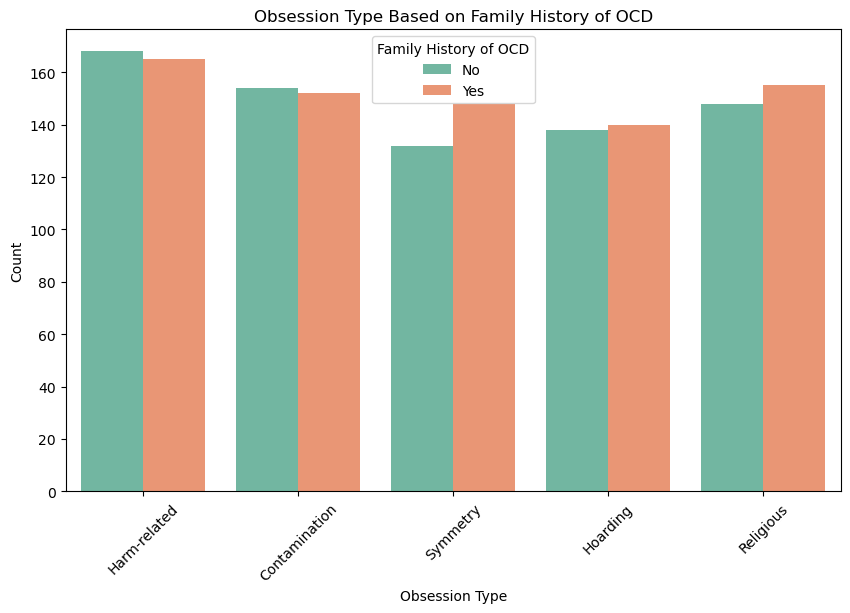

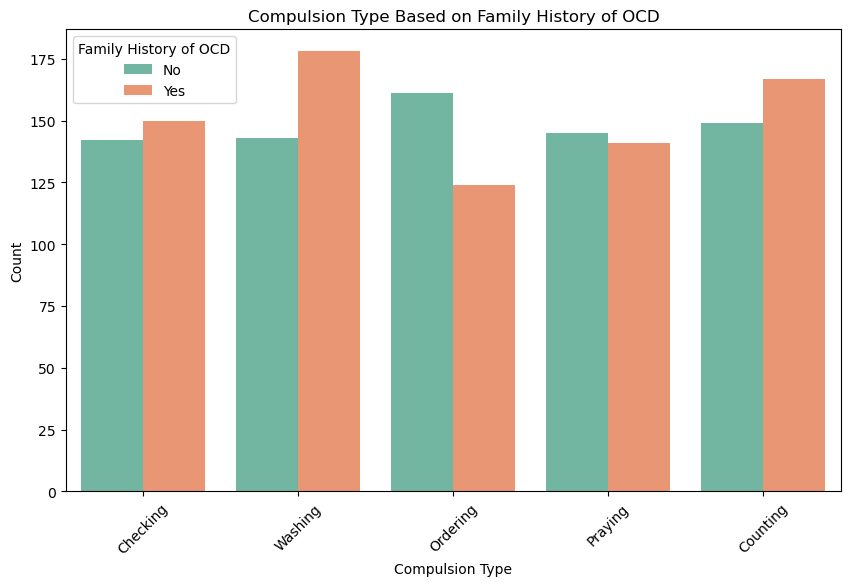

In [24]:

# Grouped bar plot for Family History vs Obsession Type
plt.figure(figsize=(10, 6))
sns.countplot(x="Obsession Type", hue="Family History of OCD", data=OCD_Patient_data, palette="Set2")
plt.title("Obsession Type Based on Family History of OCD")
plt.xlabel("Obsession Type")
plt.ylabel("Count")
plt.legend(title="Family History of OCD")
plt.xticks(rotation=45)
plt.show()

# Grouped bar plot for Family History vs Compulsion Type
plt.figure(figsize=(10, 6))
sns.countplot(x="Compulsion Type", hue="Family History of OCD", data=OCD_Patient_data, palette="Set2")
plt.title("Compulsion Type Based on Family History of OCD")
plt.xlabel("Compulsion Type")
plt.ylabel("Count")
plt.legend(title="Family History of OCD")
plt.xticks(rotation=45)
plt.show()


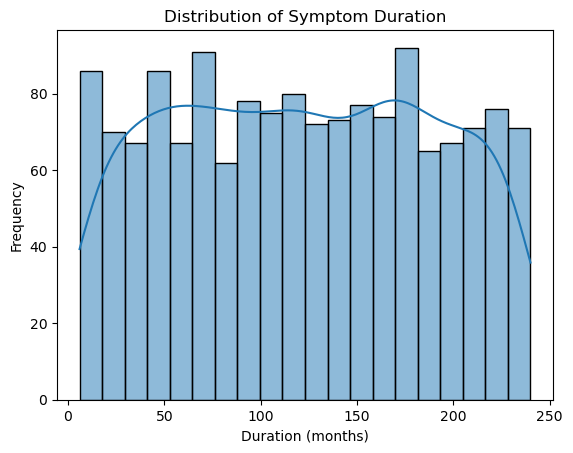

In [25]:
# Distribution of symptom duration
sns.histplot(OCD_Patient_data['Duration of Symptoms (months)'], bins=20,
kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

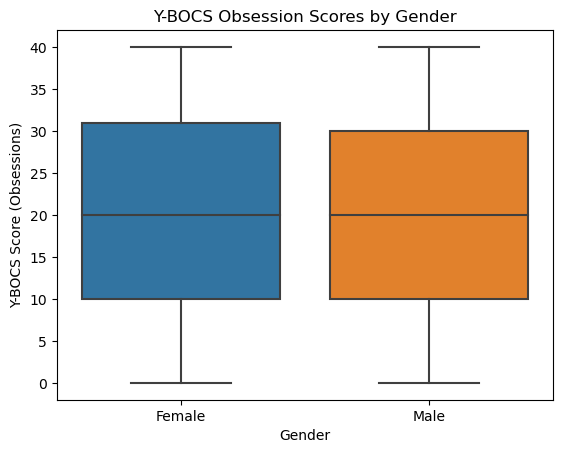

In [26]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=OCD_Patient_data)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

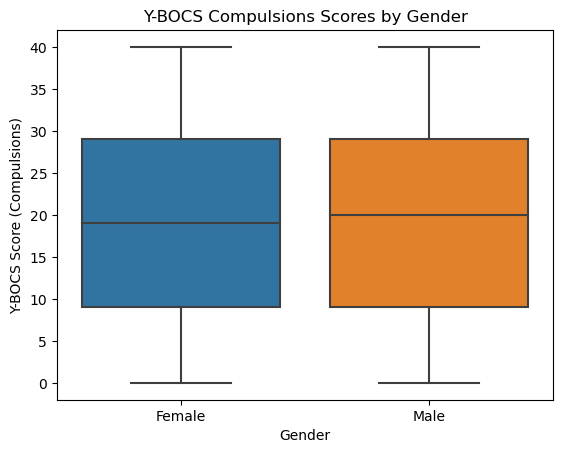

In [27]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Compulsions)', data=OCD_Patient_data)
plt.title('Y-BOCS Compulsions Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

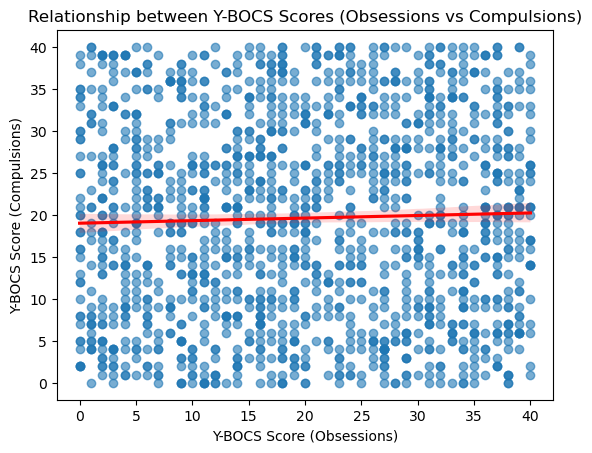

In [28]:
# Relationship between Obsession and Compulsion Y-BOCS Scores

sns.regplot(x="Y-BOCS Score (Obsessions)", y="Y-BOCS Score (Compulsions)", data=OCD_Patient_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

In [29]:
obsessions = OCD_Patient_data["Y-BOCS Score (Obsessions)"]
compulsions = OCD_Patient_data["Y-BOCS Score (Compulsions)"]

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(obsessions, compulsions)[0, 1]
print("Correlation Coefficient (R-value):", correlation_coefficient)

Correlation Coefficient (R-value): 0.030630818442664888


In [30]:
# Group by Age_Group and calculate correlation for each group
age_group_correlations = OCD_Patient_data.groupby("Age_Group").apply(lambda group: np.corrcoef(group["Y-BOCS Score (Obsessions)"], group["Y-BOCS Score (Compulsions)"])[0, 1])

print("Correlation Coefficient by Age Group:")
print(age_group_correlations)


Correlation Coefficient by Age Group:
Age_Group
18-20    0.060587
21-23    0.242696
24-26   -0.126522
27-29   -0.152963
30-32    0.193382
33-35   -0.053192
36-38   -0.022229
39-41   -0.052062
42-44    0.192521
45-47   -0.029595
48-50    0.141425
51-53   -0.055050
54-56   -0.019013
57-59    0.146816
60-62    0.150755
63-65   -0.047958
66-68   -0.048452
69-71    0.005959
72-74    0.113466
75-77    0.104740
dtype: float64


In [31]:
# Group by Family_History_of_OCD
family_history_correlations = OCD_Patient_data.groupby("Family History of OCD").apply(lambda group: np.corrcoef(group["Y-BOCS Score (Obsessions)"], group["Y-BOCS Score (Compulsions)"])[0, 1])

print("Correlation Coefficient by Family History of OCD:")
print(family_history_correlations)


Correlation Coefficient by Family History of OCD:
Family History of OCD
No     0.046898
Yes    0.013606
dtype: float64


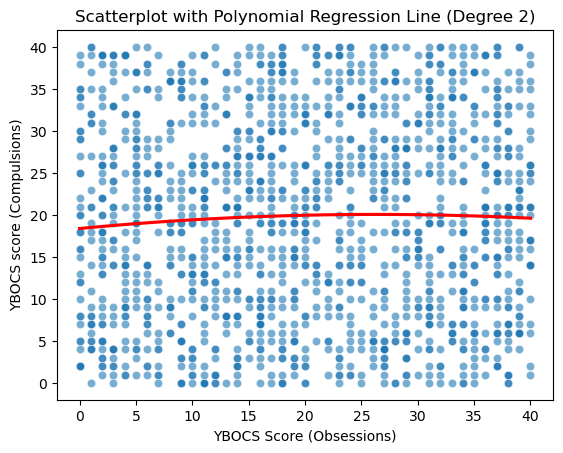

In [32]:


# Scatterplot with a polynomial regression line
sns.scatterplot(x="Y-BOCS Score (Obsessions)", y="Y-BOCS Score (Compulsions)", data=OCD_Patient_data, alpha=0.6)
sns.regplot(
    x="Y-BOCS Score (Obsessions)", 
    y="Y-BOCS Score (Compulsions)", 
    data=OCD_Patient_data, 
    order=2,  # Polynomial of degree 2
    scatter=False, 
    color="red", 
    ci=None
)
plt.title("Scatterplot with Polynomial Regression Line (Degree 2)")
plt.xlabel("YBOCS Score (Obsessions)")
plt.ylabel("YBOCS score (Compulsions)")
plt.show()


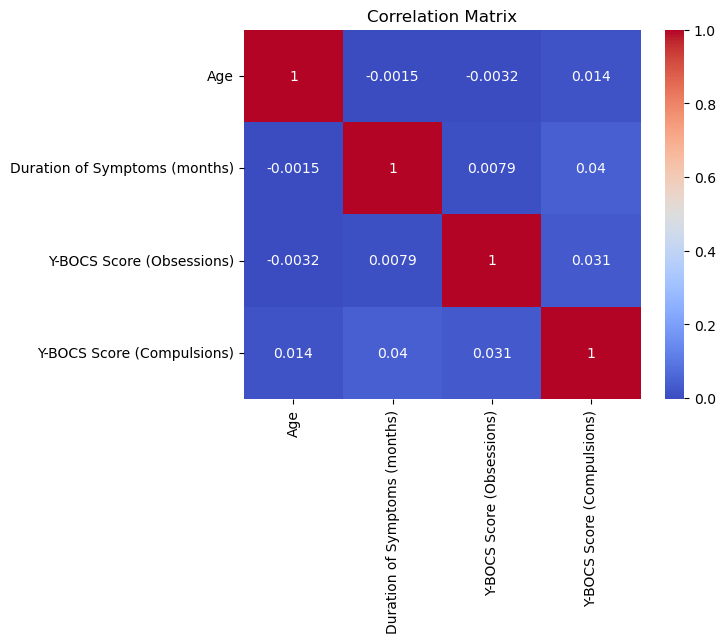

In [33]:
# Correlation matrix
corr_matrix =OCD_Patient_data[['Age', 'Duration of Symptoms (months)','Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

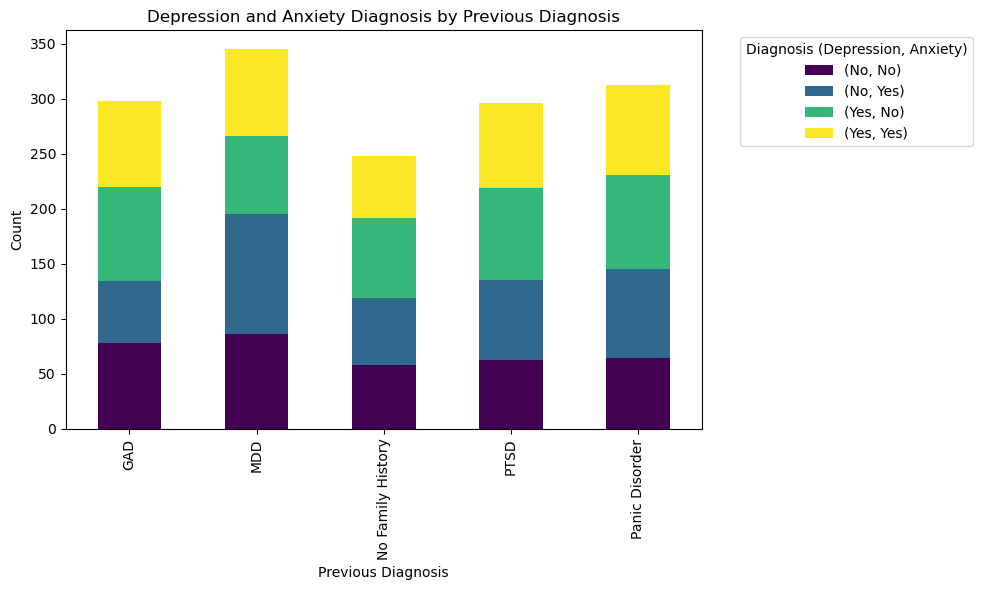

In [34]:
# Group by Previous Diagnosis and count Depression/Anxiety occurrences
grouped_data = OCD_Patient_data.groupby(['Previous Diagnoses', 'Depression Diagnosis', 'Anxiety Diagnosis']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Previous Diagnoses', columns=['Depression Diagnosis', 'Anxiety Diagnosis'], values='Count').fillna(0)

# Plot a grouped bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Depression and Anxiety Diagnosis by Previous Diagnosis')
plt.xlabel('Previous Diagnosis')
plt.ylabel('Count')
plt.legend(title='Diagnosis (Depression, Anxiety)', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


The chart stacks cases based on the combination of depression and anxiety diagnoses:

(No, No): Neither depression nor anxiety diagnosed (purple).
(No, Yes): Only anxiety diagnosed (blue).
(Yes, No): Only depression diagnosed (green).
(Yes, Yes): Both depression and anxiety diagnosed (yellow).

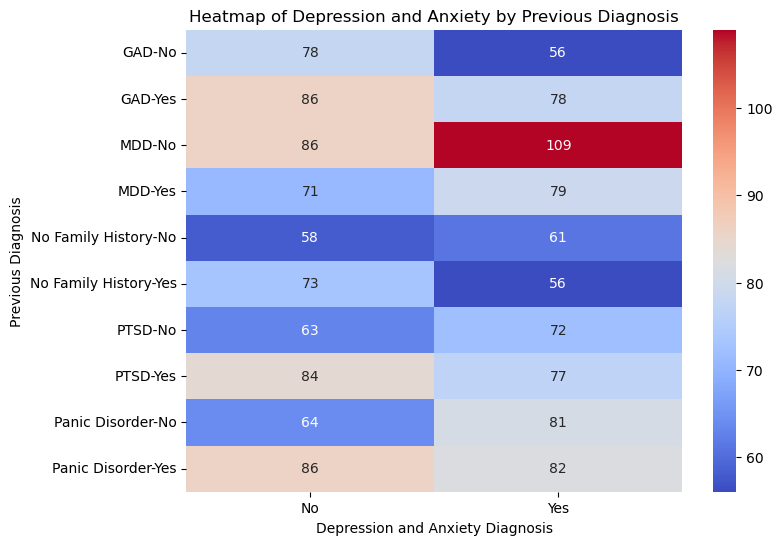

In [35]:
#Create a contingency table for heatmap
heatmap_data = OCD_Patient_data.groupby(['Previous Diagnoses', 'Depression Diagnosis', 'Anxiety Diagnosis']).size().unstack(fill_value=0)

#Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Depression and Anxiety by Previous Diagnosis')
plt.xlabel('Depression and Anxiety Diagnosis')
plt.ylabel('Previous Diagnosis')
plt.show()

In [36]:
# Calculate IQR for obsessions
Q1_obs = OCD_Patient_data['Y-BOCS Score (Obsessions)'].quantile(0.25)
Q3_obs = OCD_Patient_data['Y-BOCS Score (Obsessions)'].quantile(0.75)
IQR_obs = Q3_obs - Q1_obs

# Define the lower and upper bounds
lower_bound_obs = Q1_obs - 1.5 * IQR_obs
upper_bound_obs = Q3_obs + 1.5 * IQR_obs

# Find outliers in obsessions
obsession_outliers_iqr = OCD_Patient_data[
    (OCD_Patient_data['Y-BOCS Score (Obsessions)'] < lower_bound_obs) |
    (OCD_Patient_data['Y-BOCS Score (Obsessions)'] > upper_bound_obs)
]

# Repeat for compulsions
Q1_comp = OCD_Patient_data['Y-BOCS Score (Compulsions)'].quantile(0.25)
Q3_comp = OCD_Patient_data['Y-BOCS Score (Compulsions)'].quantile(0.75)
IQR_comp = Q3_comp - Q1_comp

lower_bound_comp = Q1_comp - 1.5 * IQR_comp
upper_bound_comp = Q3_comp + 1.5 * IQR_comp

compulsion_outliers_iqr = OCD_Patient_data[
    (OCD_Patient_data['Y-BOCS Score (Compulsions)'] < lower_bound_comp) |
    (OCD_Patient_data['Y-BOCS Score (Compulsions)'] > upper_bound_comp)
]

print("IQR-based Outliers in Obsessions:")
print(obsession_outliers_iqr)

print("IQR-based Outliers in Compulsions:")
print(compulsion_outliers_iqr)


IQR-based Outliers in Obsessions:
Empty DataFrame
Columns: [Patient ID, Age, Gender, Ethnicity, Marital Status, Education Level, OCD Diagnosis Date, Duration of Symptoms (months), Previous Diagnoses, Family History of OCD, Obsession Type, Compulsion Type, Y-BOCS Score (Obsessions), Y-BOCS Score (Compulsions), Depression Diagnosis, Anxiety Diagnosis, Medications, Age_Group]
Index: []
IQR-based Outliers in Compulsions:
Empty DataFrame
Columns: [Patient ID, Age, Gender, Ethnicity, Marital Status, Education Level, OCD Diagnosis Date, Duration of Symptoms (months), Previous Diagnoses, Family History of OCD, Obsession Type, Compulsion Type, Y-BOCS Score (Obsessions), Y-BOCS Score (Compulsions), Depression Diagnosis, Anxiety Diagnosis, Medications, Age_Group]
Index: []


The output indicates that there are no IQR-based outliers in the columns "Y-BOCS Score (Obsessions)" and "Y-BOCS Score (Compulsions)" in the dataset


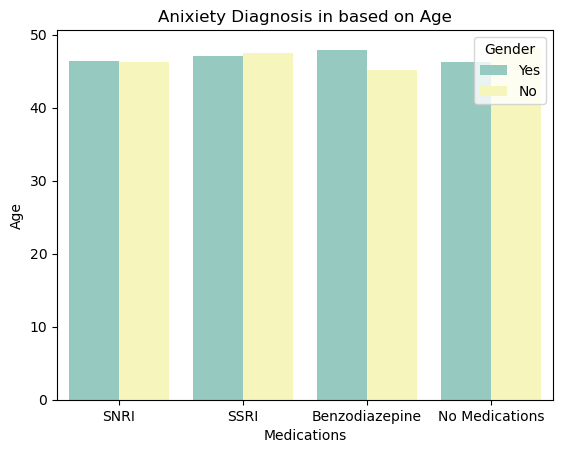

In [37]:
sns.barplot(
    x="Medications", 
    y="Age", 
    hue="Anxiety Diagnosis", 
    data=OCD_Patient_data, 
    palette="Set3",errorbar=None)
plt.title("Anixiety Diagnosis in based on Age")
plt.xlabel("Medications")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.show()

In [38]:
OCD_Patient_data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age_Group
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,30-32
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,No Family History,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,69-71
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,57-59
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,27-29
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,No Medications,54-56


# Encoding

In [39]:
OCD_Patient_data_cal.columns

Index(['Gender', 'Ethnicity', 'Marital Status', 'Education Level',
       'OCD Diagnosis Date', 'Previous Diagnoses', 'Family History of OCD',
       'Obsession Type', 'Compulsion Type', 'Depression Diagnosis',
       'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [40]:
OCD_Patient= OCD_Patient_data

In [41]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

OCD_Patient['Ethnicity']=label_encoder.fit_transform(OCD_Patient['Ethnicity'])
OCD_Patient['Marital Status']=label_encoder.fit_transform(OCD_Patient['Marital Status'])
OCD_Patient['Previous Diagnoses']=label_encoder.fit_transform(OCD_Patient['Previous Diagnoses'])
OCD_Patient['Family History of OCD']=label_encoder.fit_transform(OCD_Patient['Family History of OCD'])
OCD_Patient['Obsession Type']=label_encoder.fit_transform(OCD_Patient['Obsession Type'])
OCD_Patient['Compulsion Type']=label_encoder.fit_transform(OCD_Patient['Compulsion Type'])
OCD_Patient['Depression Diagnosis']=label_encoder.fit_transform(OCD_Patient['Depression Diagnosis'])
OCD_Patient['Anxiety Diagnosis']=label_encoder.fit_transform(OCD_Patient['Anxiety Diagnosis'])
OCD_Patient.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age_Group
0,1018,32,Female,0,2,Some College,2016-07-15,203,1,0,1,0,17,10,1,1,SNRI,30-32
1,2406,69,Male,0,0,Some College,2017-04-28,180,2,1,1,4,21,25,1,1,SSRI,69-71
2,1188,57,Male,3,0,College Degree,2018-02-02,173,1,0,0,0,3,4,0,0,Benzodiazepine,57-59
3,6200,27,Female,3,1,College Degree,2014-08-25,126,3,1,4,4,14,28,1,1,SSRI,27-29
4,5824,56,Female,3,1,High School,2022-02-20,168,3,1,2,2,39,18,0,0,No Medications,54-56


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
OCD_Patient['Education Level'] = label_encoder.fit_transform(OCD_Patient['Education Level'])
OCD_Patient['Gender']=label_encoder.fit_transform(OCD_Patient['Gender'])
OCD_Patient.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age_Group
0,1018,32,0,0,2,3,2016-07-15,203,1,0,1,0,17,10,1,1,SNRI,30-32
1,2406,69,1,0,0,3,2017-04-28,180,2,1,1,4,21,25,1,1,SSRI,69-71
2,1188,57,1,3,0,0,2018-02-02,173,1,0,0,0,3,4,0,0,Benzodiazepine,57-59
3,6200,27,0,3,1,0,2014-08-25,126,3,1,4,4,14,28,1,1,SSRI,27-29
4,5824,56,0,3,1,2,2022-02-20,168,3,1,2,2,39,18,0,0,No Medications,54-56


# Normalization

In [43]:
OCD_Patient_data_num.columns

Index(['Patient ID', 'Age', 'Duration of Symptoms (months)',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)'],
      dtype='object')

In [44]:
OCD_Patient.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age_Group
0,1018,32,0,0,2,3,2016-07-15,203,1,0,1,0,17,10,1,1,SNRI,30-32
1,2406,69,1,0,0,3,2017-04-28,180,2,1,1,4,21,25,1,1,SSRI,69-71
2,1188,57,1,3,0,0,2018-02-02,173,1,0,0,0,3,4,0,0,Benzodiazepine,57-59
3,6200,27,0,3,1,0,2014-08-25,126,3,1,4,4,14,28,1,1,SSRI,27-29
4,5824,56,0,3,1,2,2022-02-20,168,3,1,2,2,39,18,0,0,No Medications,54-56


In [45]:
from sklearn.preprocessing import MinMaxScaler

#Initialize the scaler
scaler = MinMaxScaler()
columns_to_scale = ['Age','Duration of Symptoms (months)','Y-BOCS Score (Obsessions)','Y-BOCS Score (Compulsions)']
# Scale the selected columns
for i in OCD_Patient[columns_to_scale]:
    OCD_Patient[i] = scaler.fit_transform(OCD_Patient[[i]])
OCD_Patient

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age_Group
0,1018,0.245614,0,0,2,3,2016-07-15,0.841880,1,0,1,0,0.425,0.250,1,1,SNRI,30-32
1,2406,0.894737,1,0,0,3,2017-04-28,0.743590,2,1,1,4,0.525,0.625,1,1,SSRI,69-71
2,1188,0.684211,1,3,0,0,2018-02-02,0.713675,1,0,0,0,0.075,0.100,0,0,Benzodiazepine,57-59
3,6200,0.157895,0,3,1,0,2014-08-25,0.512821,3,1,4,4,0.350,0.700,1,1,SSRI,27-29
4,5824,0.666667,0,3,1,2,2022-02-20,0.692308,3,1,2,2,0.975,0.450,0,0,No Medications,54-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,0.350877,1,3,0,0,2019-01-10,0.200855,1,0,0,4,0.525,0.825,1,1,SSRI,36-38
1496,5013,0.017544,0,3,0,1,2022-09-14,0.658120,0,1,2,3,0.625,0.400,1,1,SSRI,18-20
1497,6089,0.385965,1,1,1,3,2018-03-13,0.401709,2,1,0,1,0.050,0.375,1,1,Benzodiazepine,39-41
1498,3808,0.333333,0,2,1,3,2018-04-14,0.871795,0,1,0,4,0.400,0.175,1,0,Benzodiazepine,36-38


In [46]:
OCD_Patient.shape

(1500, 18)

In [47]:
OCD_Patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Patient ID                     1500 non-null   int64   
 1   Age                            1500 non-null   float64 
 2   Gender                         1500 non-null   int32   
 3   Ethnicity                      1500 non-null   int32   
 4   Marital Status                 1500 non-null   int32   
 5   Education Level                1500 non-null   int32   
 6   OCD Diagnosis Date             1500 non-null   object  
 7   Duration of Symptoms (months)  1500 non-null   float64 
 8   Previous Diagnoses             1500 non-null   int32   
 9   Family History of OCD          1500 non-null   int32   
 10  Obsession Type                 1500 non-null   int32   
 11  Compulsion Type                1500 non-null   int32   
 12  Y-BOCS Score (Obsessions)      150

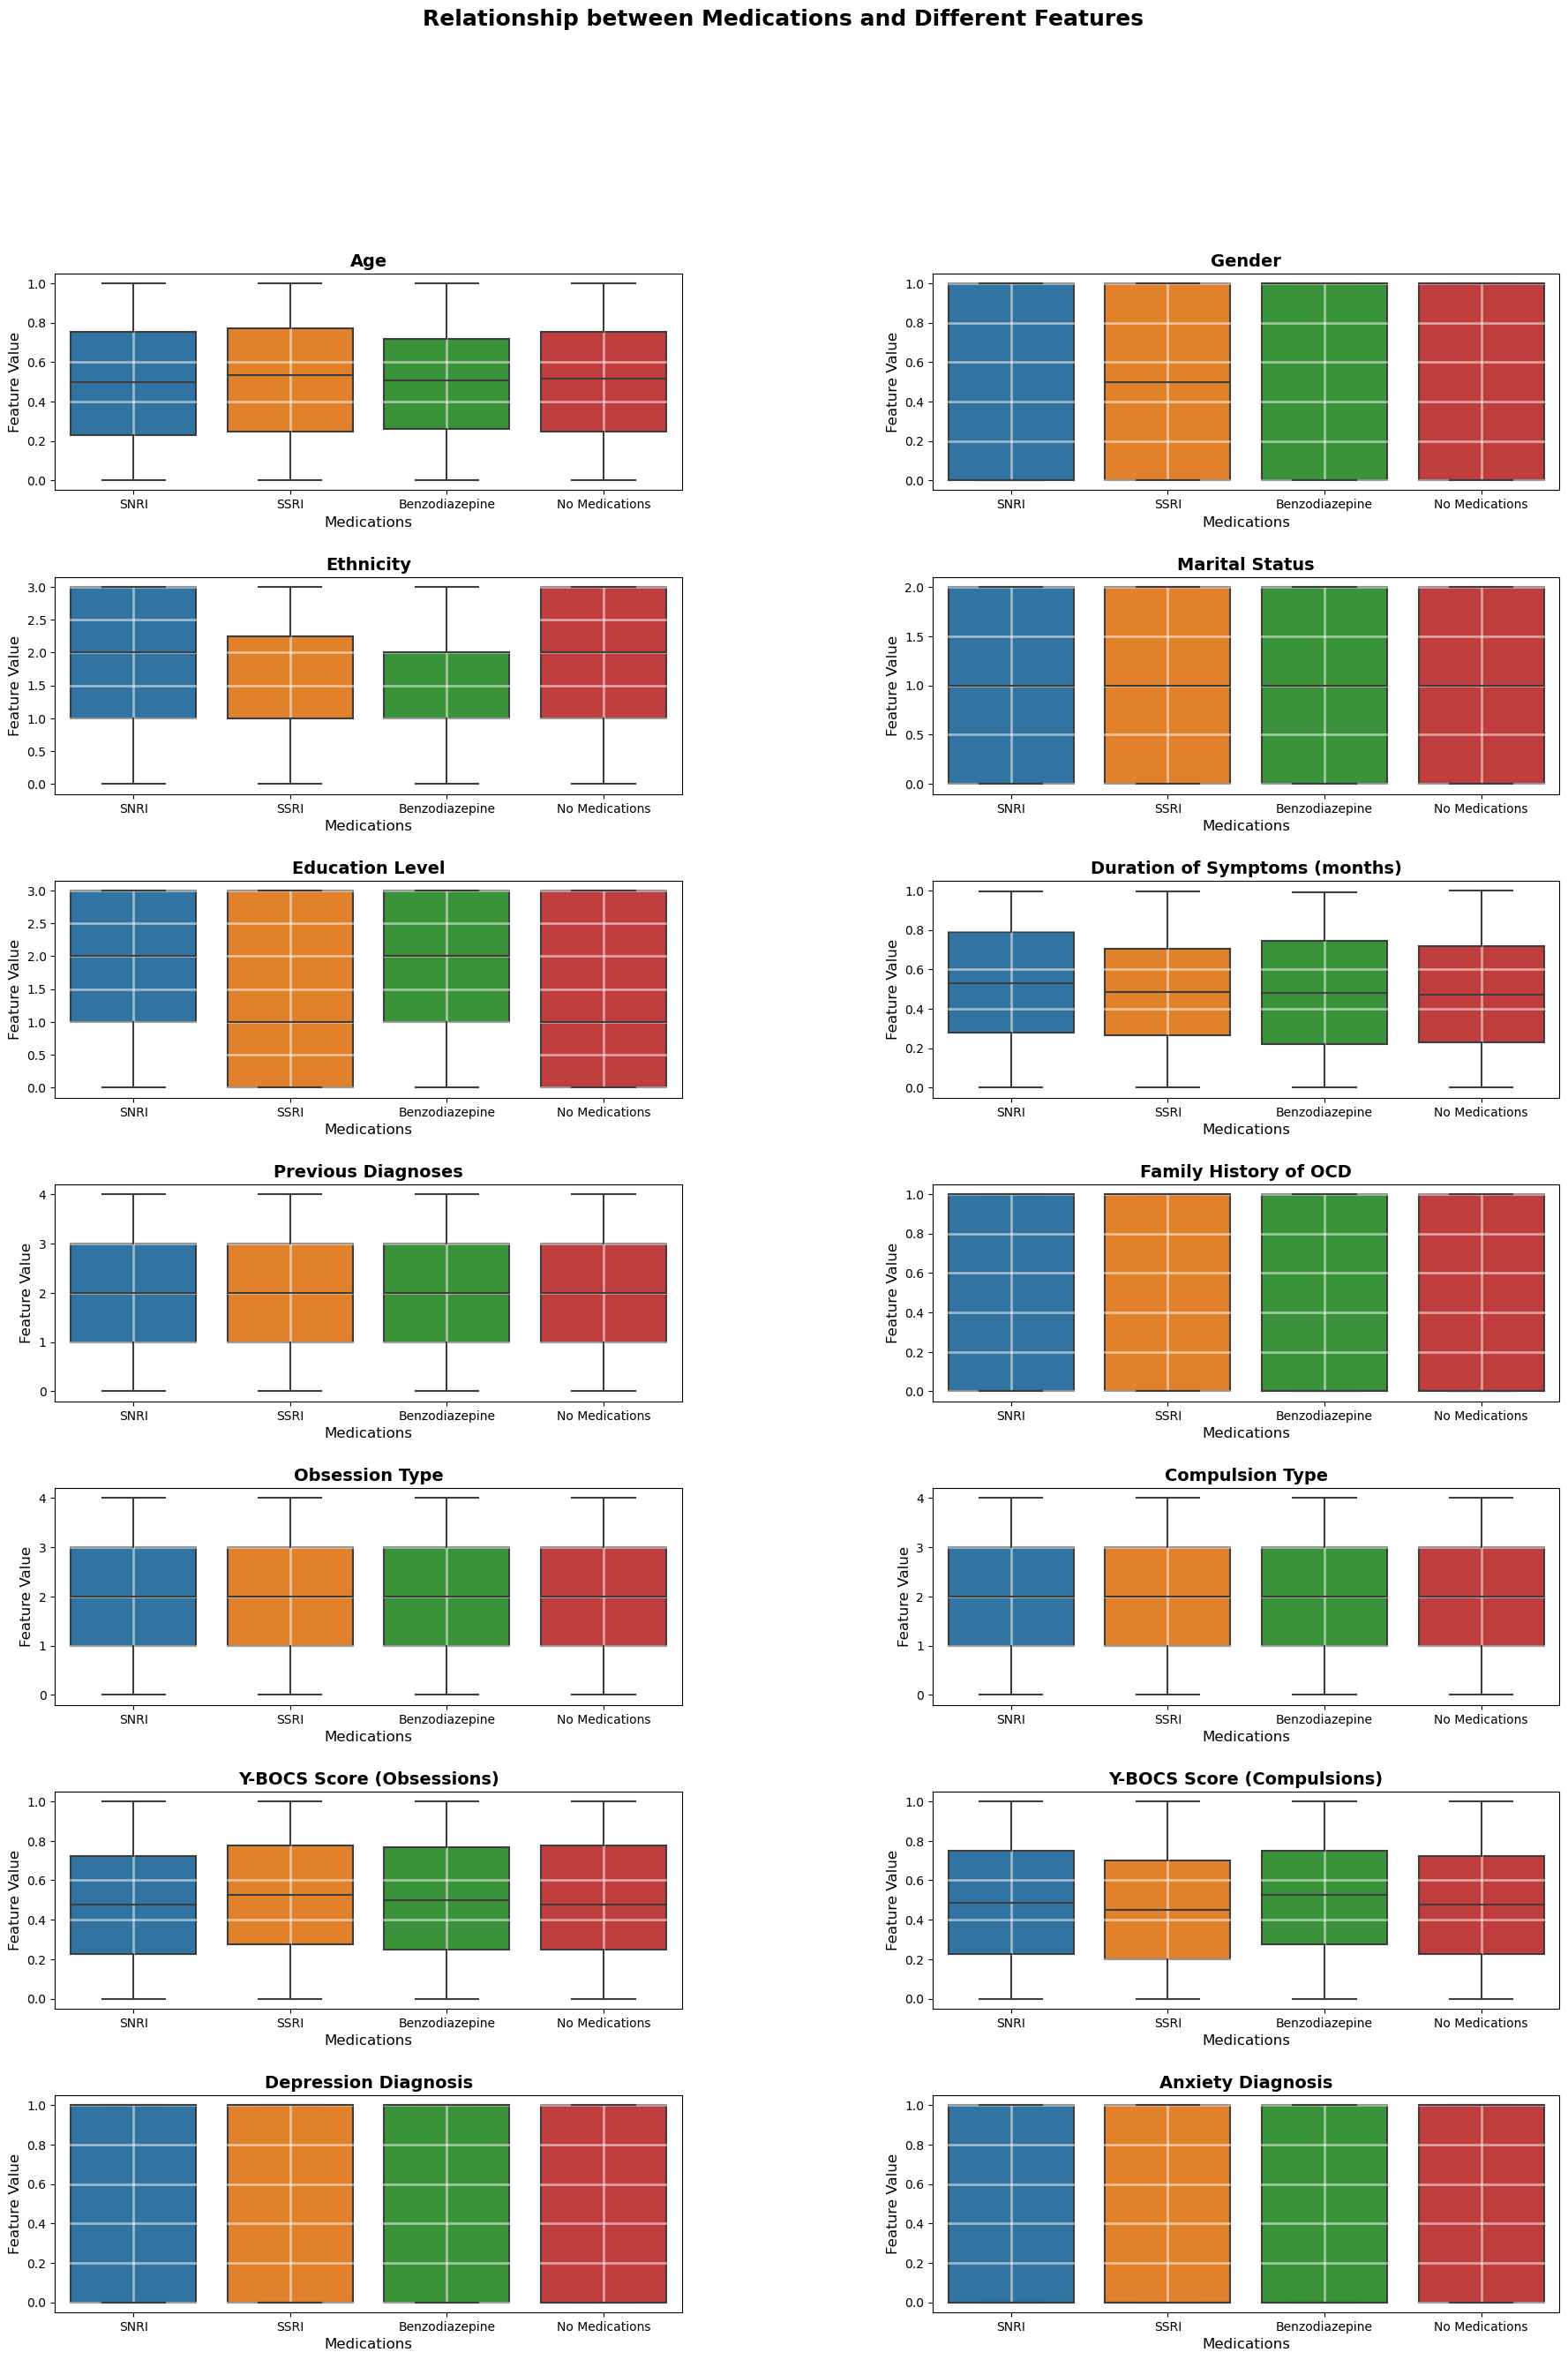

In [48]:
# Create a figure and 7x2 grid of subplots
fig, ax = plt.subplots(7, 2, figsize=(22, 30))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Titles for each subplot
titles = [
    'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
    'Duration of Symptoms (months)', 'Previous Diagnoses', 'Family History of OCD',
    'Obsession Type', 'Compulsion Type', 'Y-BOCS Score (Obsessions)',
    'Y-BOCS Score (Compulsions)', 'Depression Diagnosis', 'Anxiety Diagnosis']

# Ensure titles and subplots match
if len(titles) > len(ax):
    print("Warning: More titles than subplots. Some titles will be ignored.")
    titles = titles[:len(ax)]

# List of features for plotting
features = [
    'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
    'Duration of Symptoms (months)', 'Previous Diagnoses', 'Family History of OCD',
    'Obsession Type', 'Compulsion Type', 'Y-BOCS Score (Obsessions)',
    'Y-BOCS Score (Compulsions)', 'Depression Diagnosis', 'Anxiety Diagnosis']

# Plot each boxplot
for i in range(len(titles)):
    sns.boxplot(x='Medications', y=features[i], data=OCD_Patient, ax=ax[i])
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')
    ax[i].set_xlabel('Medications', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Adjust spacing
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a main title
fig.suptitle('Relationship between Medications and Different Features', fontsize=18, fontweight='bold')

# Show the plot
plt.show()


INFERENCE

Age:The median and spread of age across medication types are relatively similar, though slight differences might indicate age groups prone to certain medications.

Gender:Gender distributions seem consistent across medication types, indicating that gender may not strongly influence the choice of medication.

Ethnicity:Variability across medication types suggests that ethnicity could potentially influence medication choices.

Marital Status:Slight variation is observed, suggesting marital status could be a contributing factor, but it might not be highly significant.

Education Level:There is noticeable consistency in education level distribution across medications, indicating limited influence.

Duration of Symptoms (Months):A slight increase in duration is visible for specific medications. Longer durations could be linked to stronger medications like SSRIs or SNRIs.

Previous Diagnoses:Distributions seem consistent, which could mean that the type of medication is not heavily influenced by prior diagnoses.

Family History of OCD:There are no stark differences in distributions, making this a less likely predictor.

Obsession Type and Compulsion Type:Moderate differences are visible, indicating that the type of obsessions or compulsions might impact medication decisions.

Y-BOCS Scores (Obsessions and Compulsions):Y-BOCS scores (severity of symptoms) show some variation, especially for medications targeting severe cases.

Depression and Anxiety Diagnosis:Consistency across groups suggests this variable may not be a strong determinant for medications.

In [49]:
OCD_Patient = OCD_Patient_data.drop(columns=['Patient ID','OCD Diagnosis Date','Education Level','Age_Group','Family History of OCD','Previous Diagnoses','Gender'])
OCD_Patient.head()


,Age,Ethnicity,Marital Status,Duration of Symptoms (months),Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,0.245614,0,2,0.841880,1,0,0.425,0.250,1,1,SNRI
1,0.894737,0,0,0.743590,1,4,0.525,0.625,1,1,SSRI
2,0.684211,3,0,0.713675,0,0,0.075,0.100,0,0,Benzodiazepine
3,0.157895,3,1,0.512821,4,4,0.350,0.700,1,1,SSRI
4,0.666667,3,1,0.692308,2,2,0.975,0.450,0,0,No Medications


# Splitting Data

In [50]:
from sklearn.model_selection import train_test_split
df_train_x = OCD_Patient.drop('Medications',axis = 1)
df_train_y = OCD_Patient['Medications']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_samp, y_train_samp = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_train_samp, return_counts=True)
print(dict(zip(unique, counts)))

{'Benzodiazepine': 278, 'No Medications': 278, 'SNRI': 278, 'SSRI': 278}


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_train_samp, y_train_samp, test_size=0.3, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = [['LogisticRegression ', LogisticRegression(solver='liblinear',max_iter=1000, random_state=42)],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],['SVC ', SVC()],['KNeighborsClassifier ', KNeighborsClassifier()]]

In [54]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
for name, model in models:
    model = model
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(name, accuracy_score(y_test, prediction)) 

LogisticRegression  0.25748502994011974
DecisionTreeClassifier  0.2844311377245509
RandomForestClassifier  0.2694610778443114
SVC  0.2694610778443114
KNeighborsClassifier  0.2934131736526946


In [55]:
model_params = {
    
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'KNeighborsClassifier' :{
        'model': KNeighborsClassifier(),
        'params': {
        'n_neighbors': [3, 5, 7],
        #'weights': ['uniform', 'distance'],
        #'metric': ['euclidean', 'manhattan']
        }
    },
     
    'DecisionTreeClassifier  ': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    }

}

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
best_metrix = []
best_model = None
best_model_score = -1  # Initialize with a lower score to ensure any model performs better

for model_name, mp in model_params.items():
    # GridSearchCV
    clf_grid = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf_grid.fit(x_train, y_train)
    
    # Evaluate using different metrics
    y_pred_grid = clf_grid.predict(x_test)
    accuracy_grid = accuracy_score(y_test, y_pred_grid)
    precision_grid = precision_score(y_test, y_pred_grid, average='macro')
    recall_grid = recall_score(y_test, y_pred_grid, average='macro')
    f1_grid = f1_score(y_test, y_pred_grid, average='macro')
    roc_auc_grid = roc_auc_score(y_test, clf_grid.predict_proba(x_test), multi_class='ovr')
    
    
    best_metrix.append({
        'model': model_name + ' (GridSearchCV)',
        'accuracy': accuracy_grid,
        'precision': precision_grid,
        'recall': recall_grid,
        'f1-score': f1_grid,
        'roc_auc_score': roc_auc_grid
      
        
    })
    # Check if this model performs better than the current best model
    if roc_auc_grid > best_model_score:
        best_model_score = roc_auc_grid
        best_model = clf_grid.best_estimator_
    
    # RandomizedSearchCV
    clf_random = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)
    
    # Evaluate using different metrics
    y_pred_random = clf_random.predict(x_test)
    accuracy_random = accuracy_score(y_test, y_pred_random)
    precision_random = precision_score(y_test, y_pred_random, average='macro')
    recall_random = recall_score(y_test, y_pred_random, average='macro')
    f1_random = f1_score(y_test, y_pred_random, average='macro')
    roc_auc_random = roc_auc_score(y_test, clf_random.predict_proba(x_test), multi_class='ovr')
  
    best_metrix.append({
        'model': model_name + ' (RandomizedSearchCV)',
        'accuracy': accuracy_random,
        'precision': precision_random,
        'recall': recall_random,
        'f1-score': f1_random,
        'roc_auc_score': roc_auc_random
        
    })
    
    # Check if this model performs better than the current best model
    if roc_auc_random > best_model_score:
        best_model_score = roc_auc_random
        best_model = clf_random.best_estimator_
        

# Print the evaluation results for each model
for model in best_metrix:
    print("Model:", model['model'])
    print("Accuracy:", model['accuracy'])
    print("Precision:", model['precision'])
    print("Recall:", model['recall'])
    print("F1-score:", model['f1-score'])
    print("ROC-AUC Score:", model['roc_auc_score'])
    print("-------------------------------------------")

print("Best model = ",best_model, "best_score = ",  best_model_score)
   

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model: Random_forest (GridSearchCV)
Accuracy: 0.23353293413173654
Precision: 0.23498811361909663
Recall: 0.23194467806747032
F1-score: 0.23108378131517368
ROC-AUC Score: 0.5080227268396702
-------------------------------------------
Model: Random_forest (RandomizedSearchCV)
Accuracy: 0.27844311377245506
Precision: 0.276958592959248
Recall: 0.27776048967386224
F1-score: 0.2762739605930309
ROC-AUC Score: 0.5345673103515047
-------------------------------------------
Model: KNeighborsClassifier (GridSearchCV)
Accuracy: 0.2694610778443114
Precision: 0.2739197141656158
Recall: 0.27061583029623404
F1-score: 0.2538745296098237
ROC-AUC Score: 0.5482403788496715
-------------------------------------------
Model: KNeighborsClassifier (RandomizedSearchCV)
Accuracy: 0.2694610778443114
Precision: 0.2739197141656158
Recall: 0.27061583029623404
F1-score: 0.2538745296098237
ROC-AUC Score: 0.5482403788496715
-------------------------------------------
Model: DecisionTreeClassifier   (GridSearchCV)
Accu

In [57]:
from sklearn.model_selection import cross_val_score 

# Perform cross-validation using the best model
if best_model is not None:
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
else:
    print("No best model found.")

Cross-Validation Scores: [0.38461538 0.3525641  0.32051282 0.30967742 0.3483871 ]
Mean CV Score: 0.343151364764268


In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 4 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=4)
selector.fit(x_train, y_train)

# Get the selected feature indices and names
selected_indices = selector.get_support(indices=True)
top_features = x_train.columns[selected_indices]

print("Top Features:", top_features)


Top Features: Index(['Duration of Symptoms (months)', 'Obsession Type',
       'Depression Diagnosis', 'Anxiety Diagnosis'],
      dtype='object')


In [59]:
#  Performance Validation
y_pred_test = best_model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Accuracy: 0.2694610778443114
Classification Report:
                precision    recall  f1-score   support

Benzodiazepine       0.27      0.51      0.35        82
No Medications       0.28      0.24      0.26        87
          SNRI       0.33      0.16      0.21        90
          SSRI       0.21      0.17      0.19        75

      accuracy                           0.27       334
     macro avg       0.27      0.27      0.25       334
  weighted avg       0.28      0.27      0.25       334



# Model Deployment

In [60]:
import pickle
X_train_selected = x_train[top_features ]
X_test_selected = x_test[top_features ]
model_dtc = KNeighborsClassifier()
#Model Training
model_dtc.fit(X_train_selected, y_train)

#Save the Model
prediction = model_dtc.predict(X_test_selected)
print(best_model, accuracy_score(y_test, prediction))
pickle.dump(model_dtc,open('ocd_patient_dataset.pkl','wb'))

KNeighborsClassifier(n_neighbors=3) 0.24251497005988024


In [61]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 312 to 860
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Duration of Symptoms (months)  778 non-null    float64
 1   Obsession Type                 778 non-null    int32  
 2   Depression Diagnosis           778 non-null    int32  
 3   Anxiety Diagnosis              778 non-null    int32  
dtypes: float64(1), int32(3)
memory usage: 21.3 KB


In [62]:
f=open("C://Users/LENOVO/Unified_Mentor_Internship/ocd_patient_dataset.pkl","rb")
our_model= pickle.load(f)

In [63]:
p= our_model.predict(X_train_selected)